# Census Income

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Loading Dataset

In [2]:
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Example: Label Encoding for 'Income' column
df['Income'] = label_encoder.fit_transform(df['Income'])

# Example: One-Hot Encoding for 'Race' column
df = pd.get_dummies(df, columns=['Race'], drop_first=True)


# Scaling numerical features
scaler = StandardScaler()

# Example: Scaling 'Age' and 'Hours_per_week'
df[['Age', 'Hours_per_week']] = scaler.fit_transform(df[['Age', 'Hours_per_week']])


# Splitting the data into features (X) and target variable (y)
X = df.drop('Income', axis=1)
y = df['Income']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAIN THE MODEL

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separating features (X) and target variable (y)
X = df.drop('Income', axis=1)
y = df['Income']

# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standard scaling for numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing different classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Training and evaluating each model
for clf_name, clf in classifiers.items():
    # Train the model on the training data
    clf.fit(X_train_scaled, y_train)

    # Predictions on the testing data
    y_pred = clf.predict(X_test_scaled)

    # Evaluating the model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy:.2f}")

    # Classification report
    print(f"{clf_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Random Forest Accuracy: 0.85
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.74      0.62      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512



SVM Accuracy: 0.85
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4912
           1       0.74      0.58      0.65      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.76      0.77      6512
weighted avg       0.84      0.85      0.84      6512



KNN Accuracy: 0.82
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4912
           1       0.65      0.57      0.61      1600

    accuracy        

C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**OBSERVATION:**

Random Forest and SVM exhibit similar overall accuracy and balanced precision-recall trade-offs.
KNN has a lower accuracy and shows more imbalance in precision-recall.
The choice between Random Forest and SVM may depend on specific considerations, such as interpretability, training time, or the importance of false positives vs. false negatives.

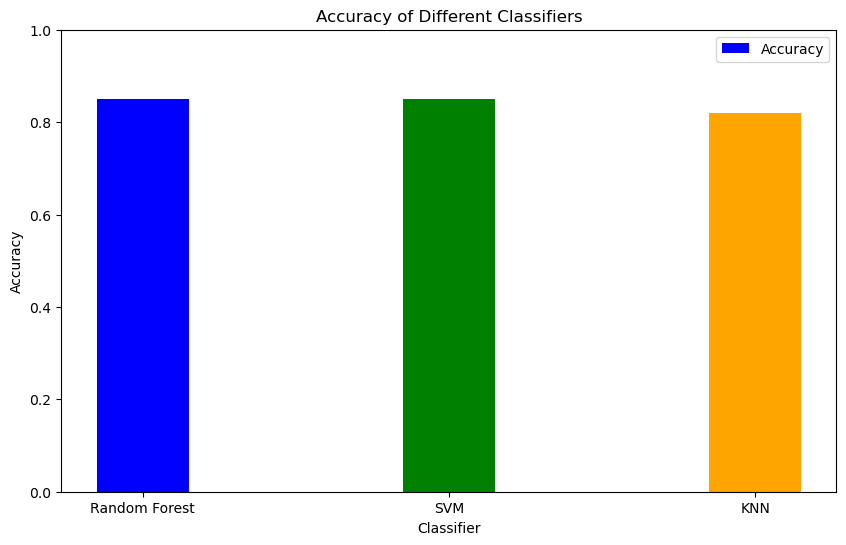

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores
accuracy_scores = {
    'Random Forest': 0.85,
    'SVM': 0.85,
    'KNN': 0.82
}

classifiers = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Plotting the accuracy scores
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(classifiers))

bar1 = ax.bar(index, scores, bar_width, label='Accuracy', color=['blue', 'green', 'orange'])

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classifiers')
ax.set_xticks(index)
ax.set_xticklabels(classifiers)
ax.legend()

plt.ylim(0, 1.0)
plt.show()


# Cross-Validation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Separating features (X) and target variable (y)
X = df.drop('Income', axis=1)
y = df['Income']  
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Initializing different classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42)),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier())
}

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    # Use 5-fold cross-validation
    cross_val_scores = cross_val_score(clf, X_encoded, y, cv=5, scoring='accuracy')

    # Displaying cross-validation results
    print(f"{clf_name} Cross-Validation Scores: {cross_val_scores}")
    print(f"{clf_name} Average Cross-Validation Accuracy: {cross_val_scores.mean():.2f}\n")

Random Forest Cross-Validation Scores: [0.85165848 0.85165848 0.85181204 0.85949017 0.85841523]
Random Forest Average Cross-Validation Accuracy: 0.85

SVM Cross-Validation Scores: [0.84505528 0.84766585 0.85150491 0.85380835 0.84904791]
SVM Average Cross-Validation Accuracy: 0.85



C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

KNN Cross-Validation Scores: [0.82371007 0.82140663 0.81956388 0.82632064 0.82109951]
KNN Average Cross-Validation Accuracy: 0.82



C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search for Random Forest
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Displaying best hyperparameters and accuracy
print("Random Forest - Best Hyperparameters:", grid_search.best_params_)
print("Random Forest - Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluating on the test set with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest - Test Set Accuracy with Best Hyperparameters:", test_accuracy)

Random Forest - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Best Cross-Validation Accuracy: 0.8634827069198483
Random Forest - Test Set Accuracy with Best Hyperparameters: 0.8651719901719902


**Observation:**

The Random Forest model was tuned using grid search with cross-validation to find the best hyperparameters. The optimal hyperparameters obtained are as follows:

Maximum Depth (max_depth): None (allowing nodes to expand until all leaves are pure)
Minimum Samples in a Leaf (min_samples_leaf): 2 (ensuring each leaf has at least 2 samples)
Minimum Samples for Split (min_samples_split): 2 (requiring at least 2 samples for a node to split)
Number of Estimators (n_estimators): 100 (the number of trees in the forest)
The cross-validation accuracy for the model with these hyperparameters is approximately 86.35%, indicating good generalization performance on unseen data. When evaluated on the test set, the model achieved an accuracy of 86.52%, which is consistent with the cross-validation results.

This suggests that the Random Forest model, with the selected hyperparameters, is robust and performs well on both the training data (cross-validation) and new, unseen data (test set). The absence of a specified maximum depth allows the trees to grow until all leaves are pure, potentially capturing complex relationships in the data. The chosen minimum samples for leaf and split help prevent overfitting by setting reasonable constraints on the tree structure.

In conclusion, the Random Forest model, with careful hyperparameter tuning, demonstrates strong predictive performance on the given dataset.

In [12]:
from joblib import dump

# Saving the trained Random Forest model
model_filename = 'random_forest_model.joblib'
dump(best_rf_classifier, model_filename)

print(f"Random Forest model saved to {model_filename}")


Random Forest model saved to random_forest_model.joblib
